In [1]:
from src.data_prep import prepare_dataset

prepare_dataset()

[INFO] Processed data already exists. Skipping setup.


In [2]:
from src.utils import get_device, seed_everything

seed_everything()

device = get_device()
print("Using device:", device)

Using device: cuda


In [3]:
from src.data_prep import get_dataloaders

train_loader, val_loader = get_dataloaders("../data/processed", batch_size=32)

# Peek at a batch
images, labels = next(iter(train_loader))
print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)

Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32])


In [4]:
import os
from src.model import build_model

num_classes = len(os.listdir("../data/processed/train"))

model = build_model(num_classes).to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
from torch import nn, optim
from src.train import train_one_epoch
from src.train import validate_one_epoch

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 5

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")

    train_loss, train_acc = train_one_epoch(model, train_loader, device, criterion, optimizer)
    val_loss, val_acc = validate_one_epoch(model, val_loader, device, criterion)

    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.2f}%")
    print(f"Val   Loss: {val_loss:.4f}, Accuracy: {val_acc:.2f}%")


Epoch 1/5
Train Loss: 0.6819, Accuracy: 75.66%
Val   Loss: 0.4607, Accuracy: 82.48%

Epoch 2/5
Train Loss: 0.3428, Accuracy: 87.40%
Val   Loss: 0.3825, Accuracy: 85.89%

Epoch 3/5
Train Loss: 0.2465, Accuracy: 91.03%
Val   Loss: 0.3728, Accuracy: 86.17%

Epoch 4/5
Train Loss: 0.2023, Accuracy: 92.16%
Val   Loss: 0.3910, Accuracy: 86.75%

Epoch 5/5
Train Loss: 0.1729, Accuracy: 92.86%
Val   Loss: 0.3845, Accuracy: 86.69%


In [6]:
from src.utils import save_model

save_model(model, path="../saved_models/eye_disease_cnn.pth")

[INFO] Model saved to ../saved_models/eye_disease_cnn.pth


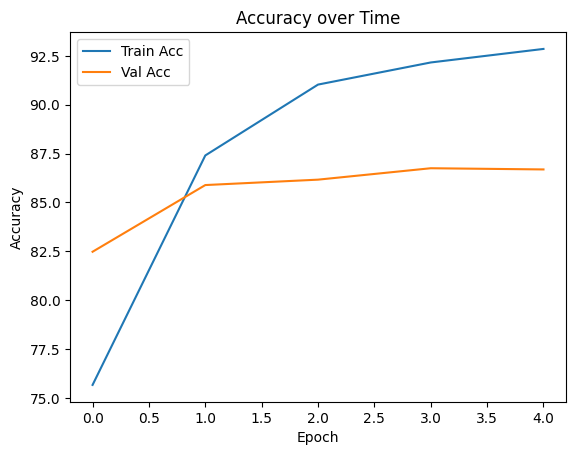

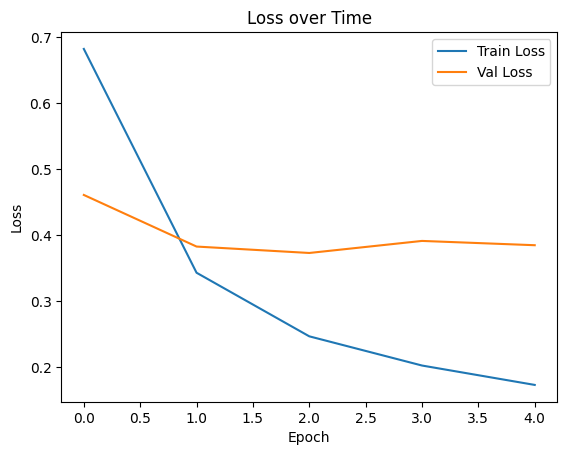

In [7]:
import matplotlib.pyplot as plt

plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Time")
plt.show()

plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Time")
plt.show()